In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!ls /home/shared/sp18-is590dv/

In [20]:
ufos = pd.read_csv("/home/shared/sp18-is590dv/data/ufo-scrubbed-geocoded-time-standardized.csv",
                  names = ["date", "city", "state", "country",
                           "shape", "duration_seconds",
                           "duration", "comment", "report_date",
                           "latitude", "longitude"],
                   parse_dates = ["date", "report_date"]
)

In [21]:
ufos.columns

Index(['date', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration', 'comment', 'report_date', 'latitude', 'longitude'],
      dtype='object')

In [22]:
ufos.dtypes

date                datetime64[ns]
city                        object
state                       object
country                     object
shape                       object
duration_seconds           float64
duration                    object
comment                     object
report_date         datetime64[ns]
latitude                   float64
longitude                  float64
dtype: object

In [25]:
ufos["shape"].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'round', 'crescent', 'flare', 'hexagon', 'dome', 'changed'],
      dtype=object)

In [29]:
ufos["shape"] = ufos["shape"].astype('category')

In [30]:
ufos.dtypes

date                datetime64[ns]
city                        object
state                       object
country                     object
shape                     category
duration_seconds           float64
duration                    object
comment                     object
report_date         datetime64[ns]
latitude                   float64
longitude                  float64
dtype: object

In [33]:
ufos.groupby("shape")["date"].count().describe()

count       29.000000
mean      2703.448276
std       3668.139452
min          1.000000
25%          7.000000
50%       1283.000000
75%       5213.000000
max      16565.000000
Name: date, dtype: float64

In [44]:
ufos.iloc[0]["date"].year

1949

In [60]:
ufos["years"] = ufos["date"].apply(lambda a: a.year)
ufos["hour"] = ufos["date"].apply(lambda a: a.hour)

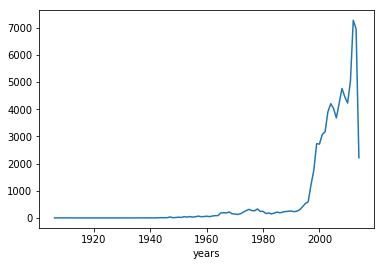

In [59]:
ufos.groupby("years")["shape"].count().plot()

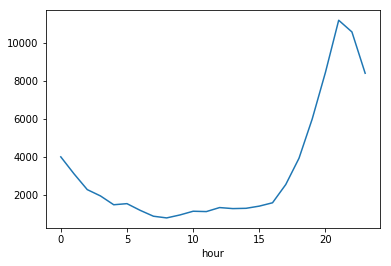

In [61]:
ufos.groupby("hour")["shape"].count().plot()

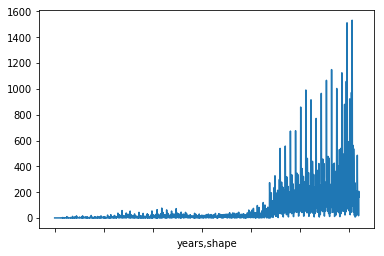

In [62]:
ufos.groupby(["years", "shape"])["date"].count()

In [76]:
series = {}
for shape, dataset in ufos.groupby("shape"):
    series[shape] = (dataset.groupby("years")["date"].count())

In [78]:
series.keys()

dict_keys(['changed', 'changing', 'chevron', 'cigar', 'circle', 'cone', 'crescent', 'cross', 'cylinder', 'delta', 'diamond', 'disk', 'dome', 'egg', 'fireball', 'flare', 'flash', 'formation', 'hexagon', 'light', 'other', 'oval', 'pyramid', 'rectangle', 'round', 'sphere', 'teardrop', 'triangle', 'unknown'])

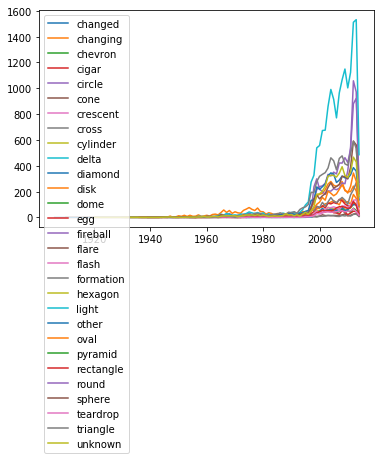

In [81]:
for shape in series:
    plt.plot(sersies[shape], label=shape)
plt.legend()

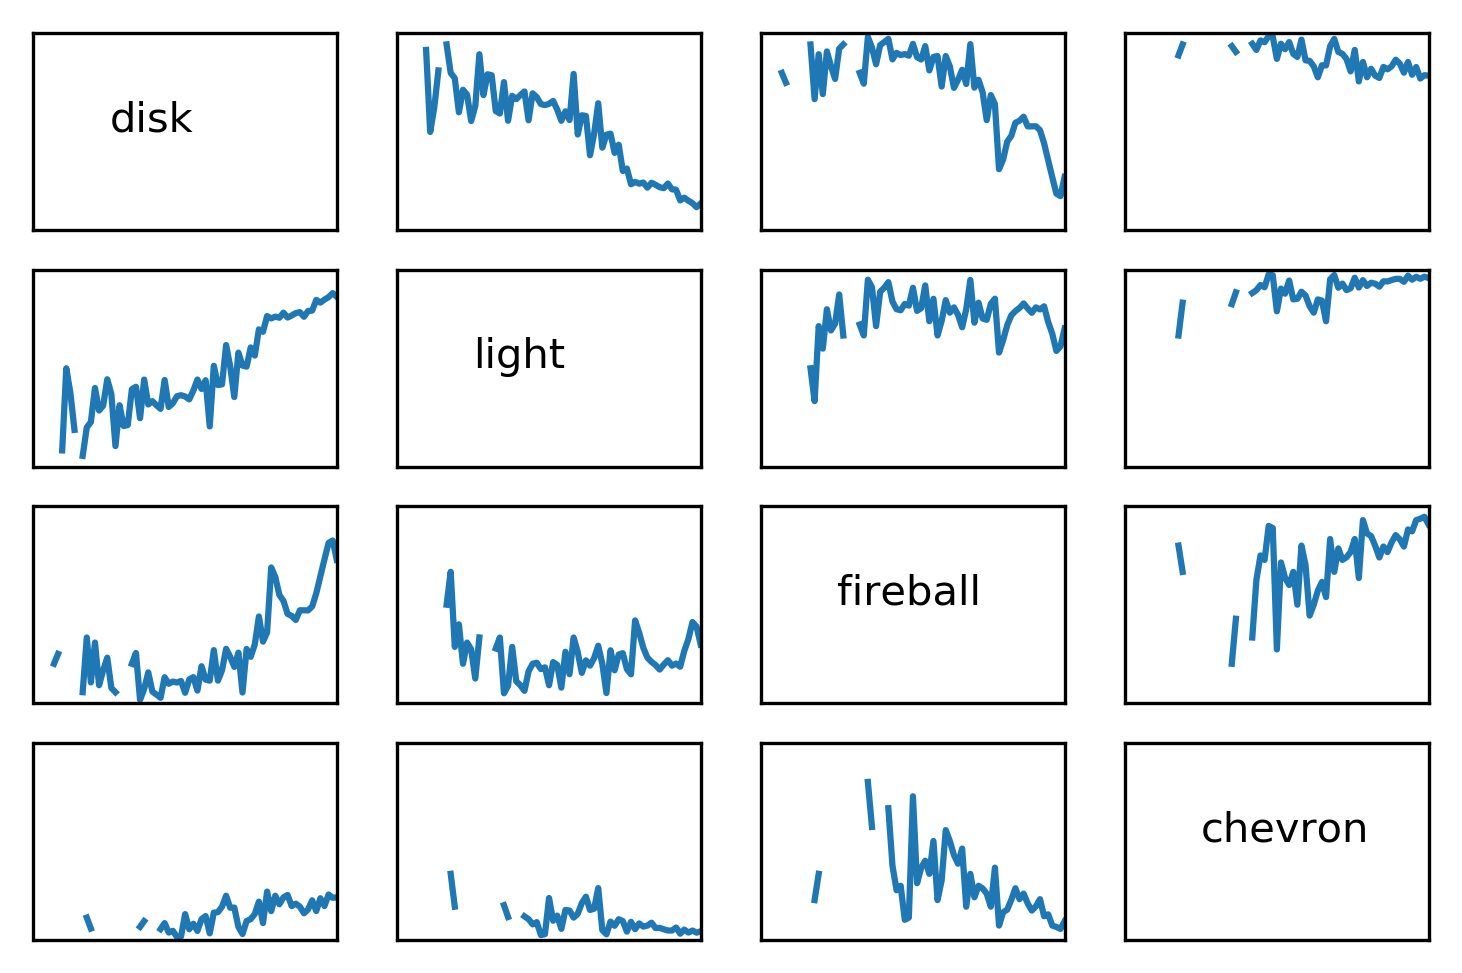

In [115]:
plt.figure(dpi=300)
shapes = ["disk", "light", "fireball", "chevron"]
for i, shape1 in enumerate(shapes):
    for j, shape2 in enumerate(shapes):
        plt.subplot(len(shapes), len(shapes), i*len(shapes) + j + 1)
        if shape1 == shape2:
            plt.text(0.25, 0.5, shape1)
            plt.xticks([])
            plt.yticks([])
            continue
        plt.plot(series[shape1] / (series[shape2] + series[shape1]))
        plt.xlim(1940, 2014)
        plt.ylim(0, 1)
        plt.xticks([])
        plt.yticks([])

In [117]:
ufos_by_date = ufos.set_index("date")

In [147]:
import ipywidgets

In [148]:
@ipywidgets.interact(freq = (1, 10, 1))
def plot(freq):
    ufos_by_date.resample('%sY' % freq)["shape"].count().plot()

interactive(children=(IntSlider(value=5, description='freq', max=10, min=1), Output()), _dom_classes=('widget-interact',))

In [149]:
ufos["latitude"].min()

-82.862752

In [150]:
ufos["latitude"].max()

72.7

In [151]:
ufos["longitude"].min(), ufos["longitude"].max()

(-176.65805559999998, 178.4419)

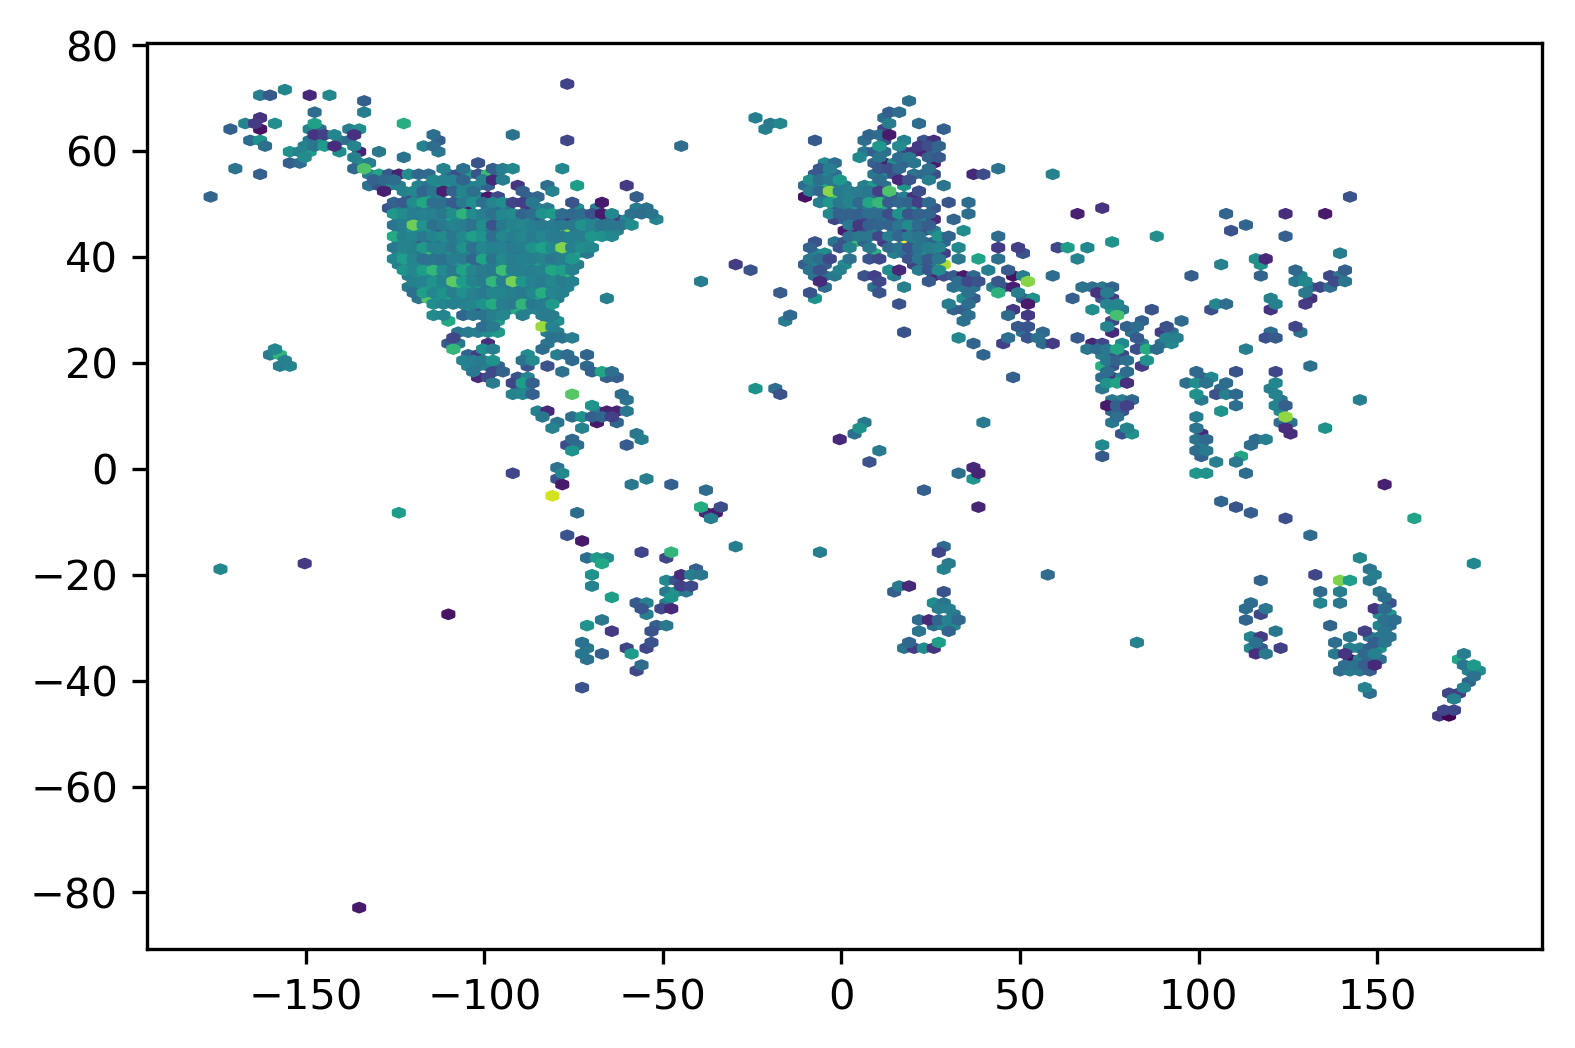

In [155]:
plt.hexbin(ufos["longitude"], ufos["latitude"], ufos["duration_seconds"], gridsize=128, bins='log')

In [169]:
binned, x, y = np.histogram2d(ufos["longitude"], ufos["latitude"], weights=ufos["duration_seconds"], bins=256)

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


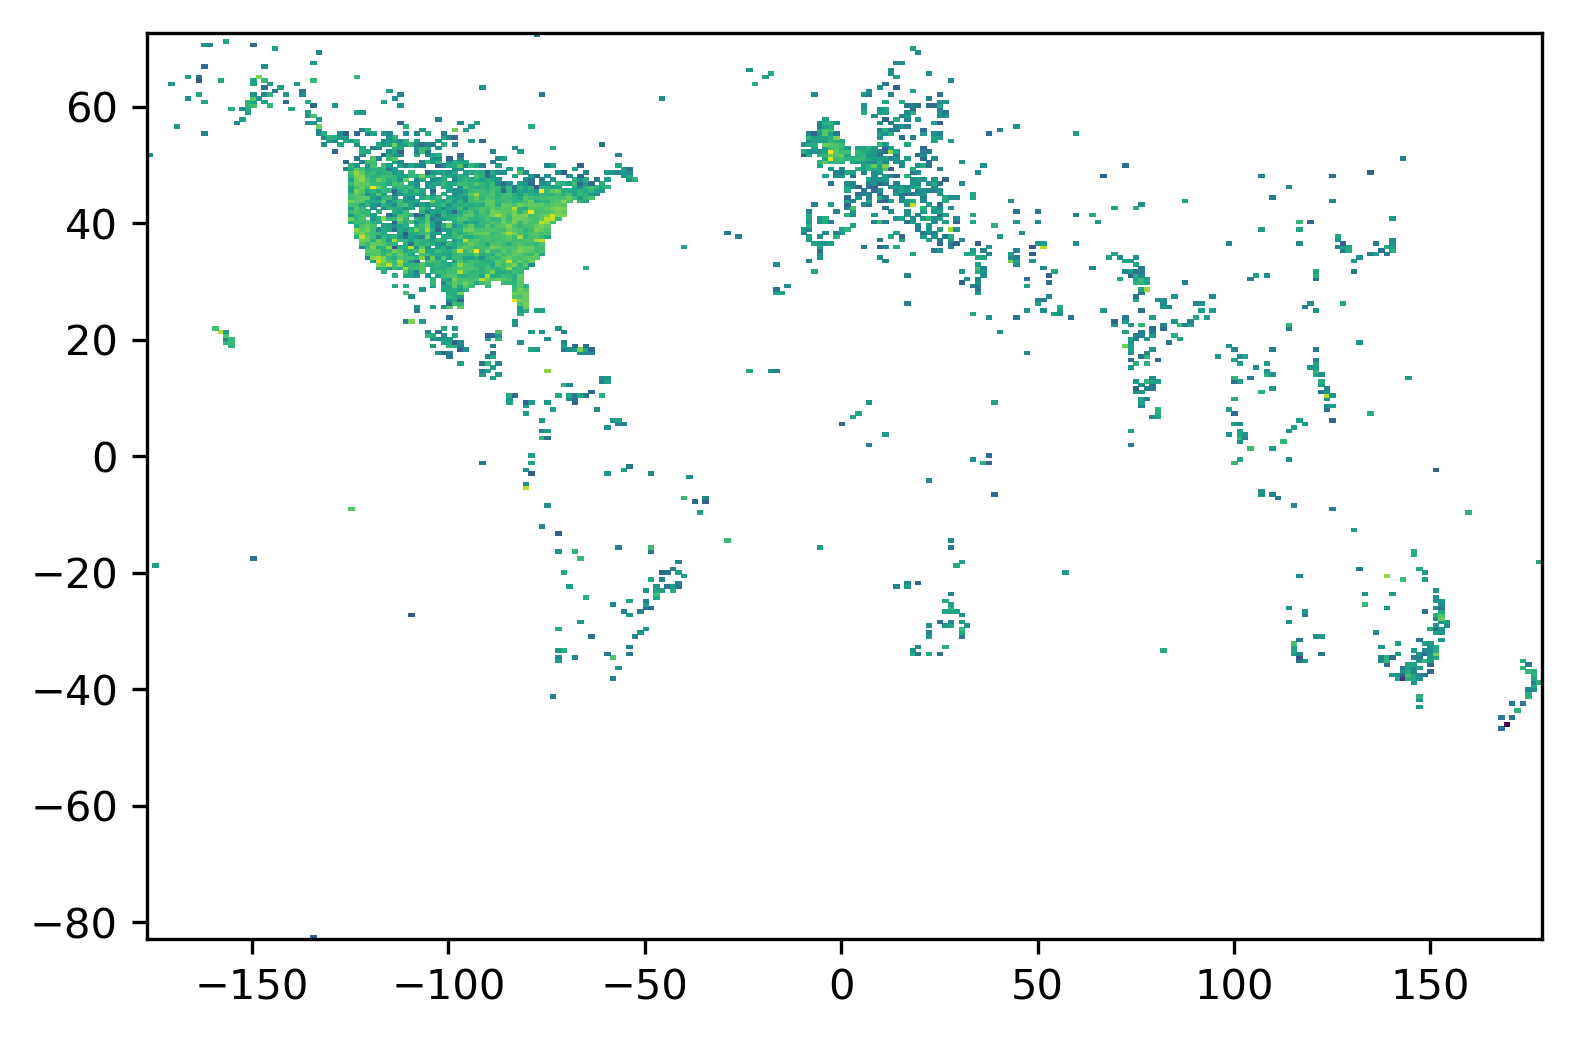

In [170]:
plt.pcolormesh(x, y, np.log10(binned).T)

In [173]:
xgrad, ygrad = np.gradient(binned)

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


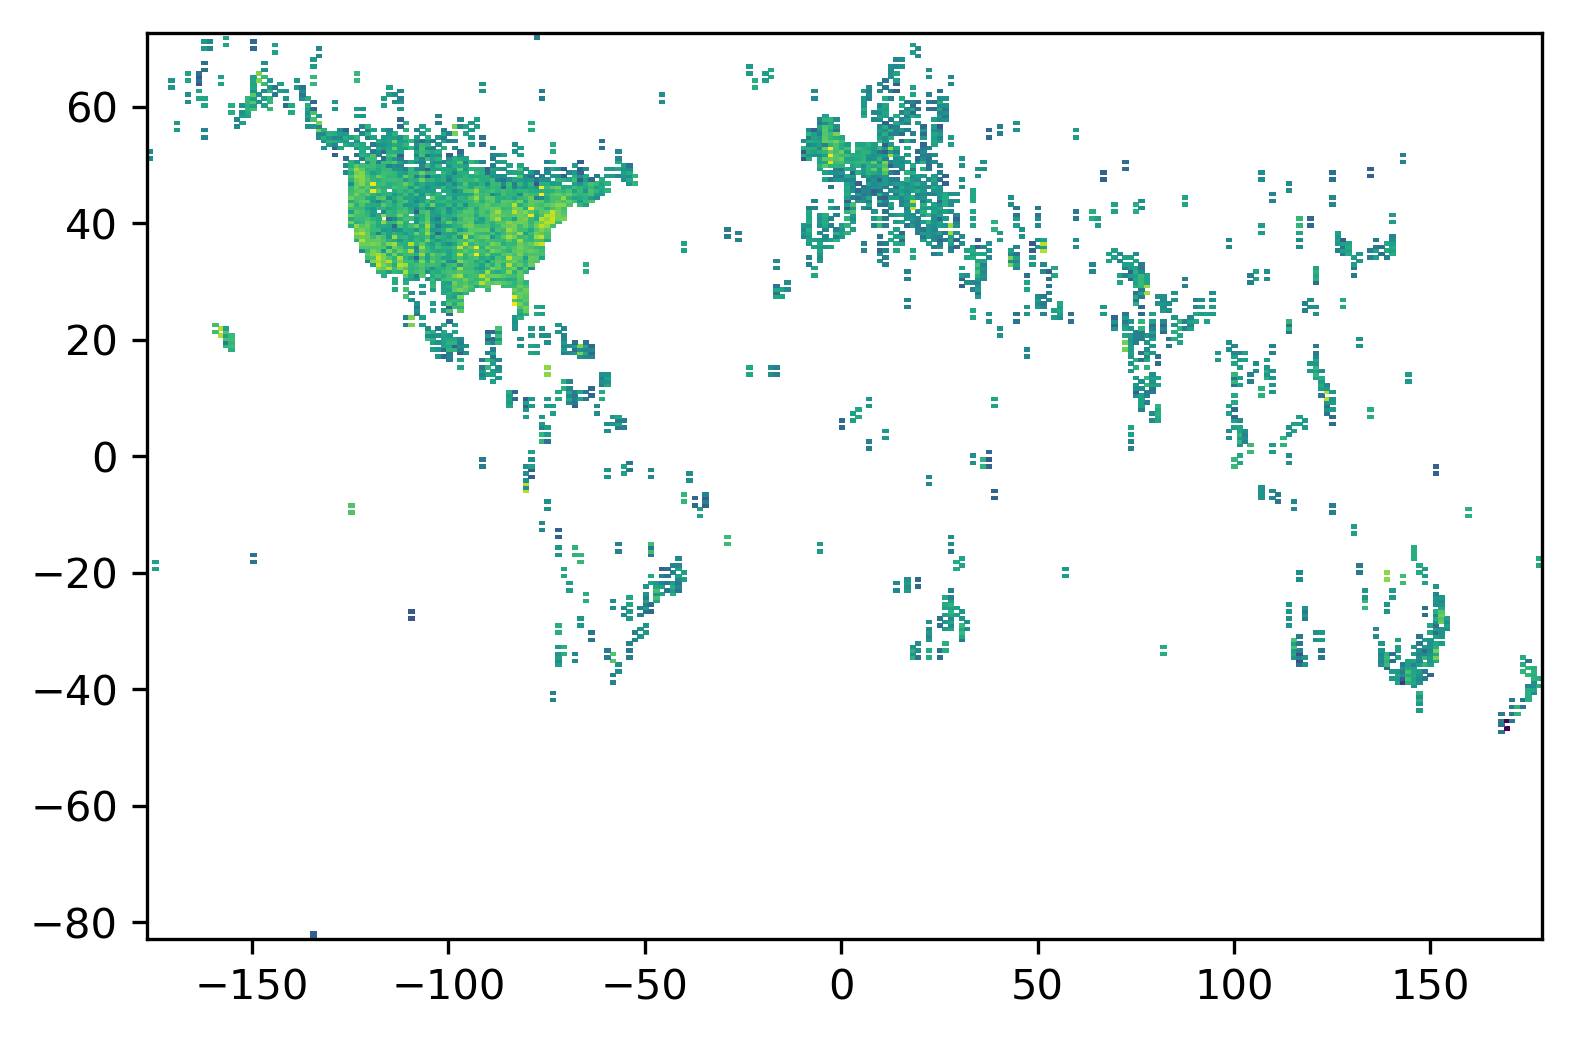

In [177]:
plt.pcolormesh(x, y, np.log10(np.abs(ygrad)).T)

In [193]:
import h5py

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [194]:
f = h5py.File("/home/shared/sp18-is590dv/data/histogram_data.h5")

In [195]:
list(f.keys())

['dist',
 'weights_x',
 'weights_xy_normal',
 'weights_xy_x',
 'weights_xy_y',
 'weights_y']

In [215]:
xy = f["/dist"][:]

weights_y = f["/weights_y"][:]
weights_x = f["/weights_x"][:]
weights_xy_normal = f["/weights_xy_normal"][:]

weights_xy_x = f["/weights_xy_x"][:]

weights_xy_y = f["/weights_xy_y"][:]

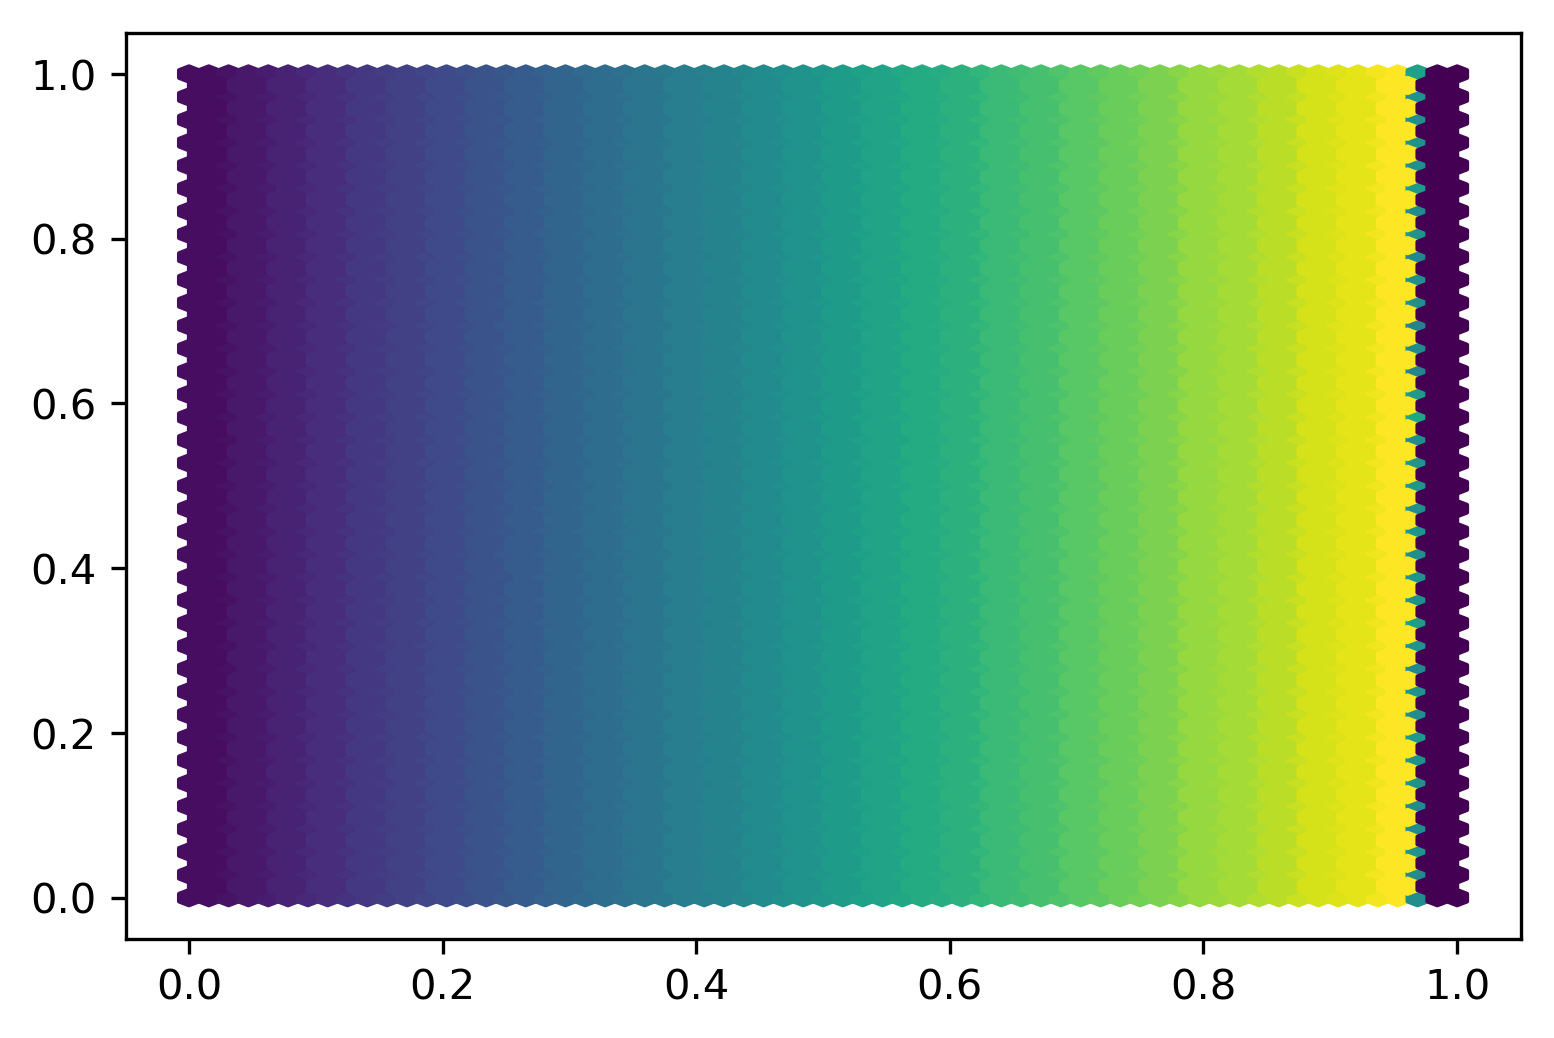

In [216]:
plt.hexbin(xy[:,0], xy[:,1], weights_x, gridsize=64)

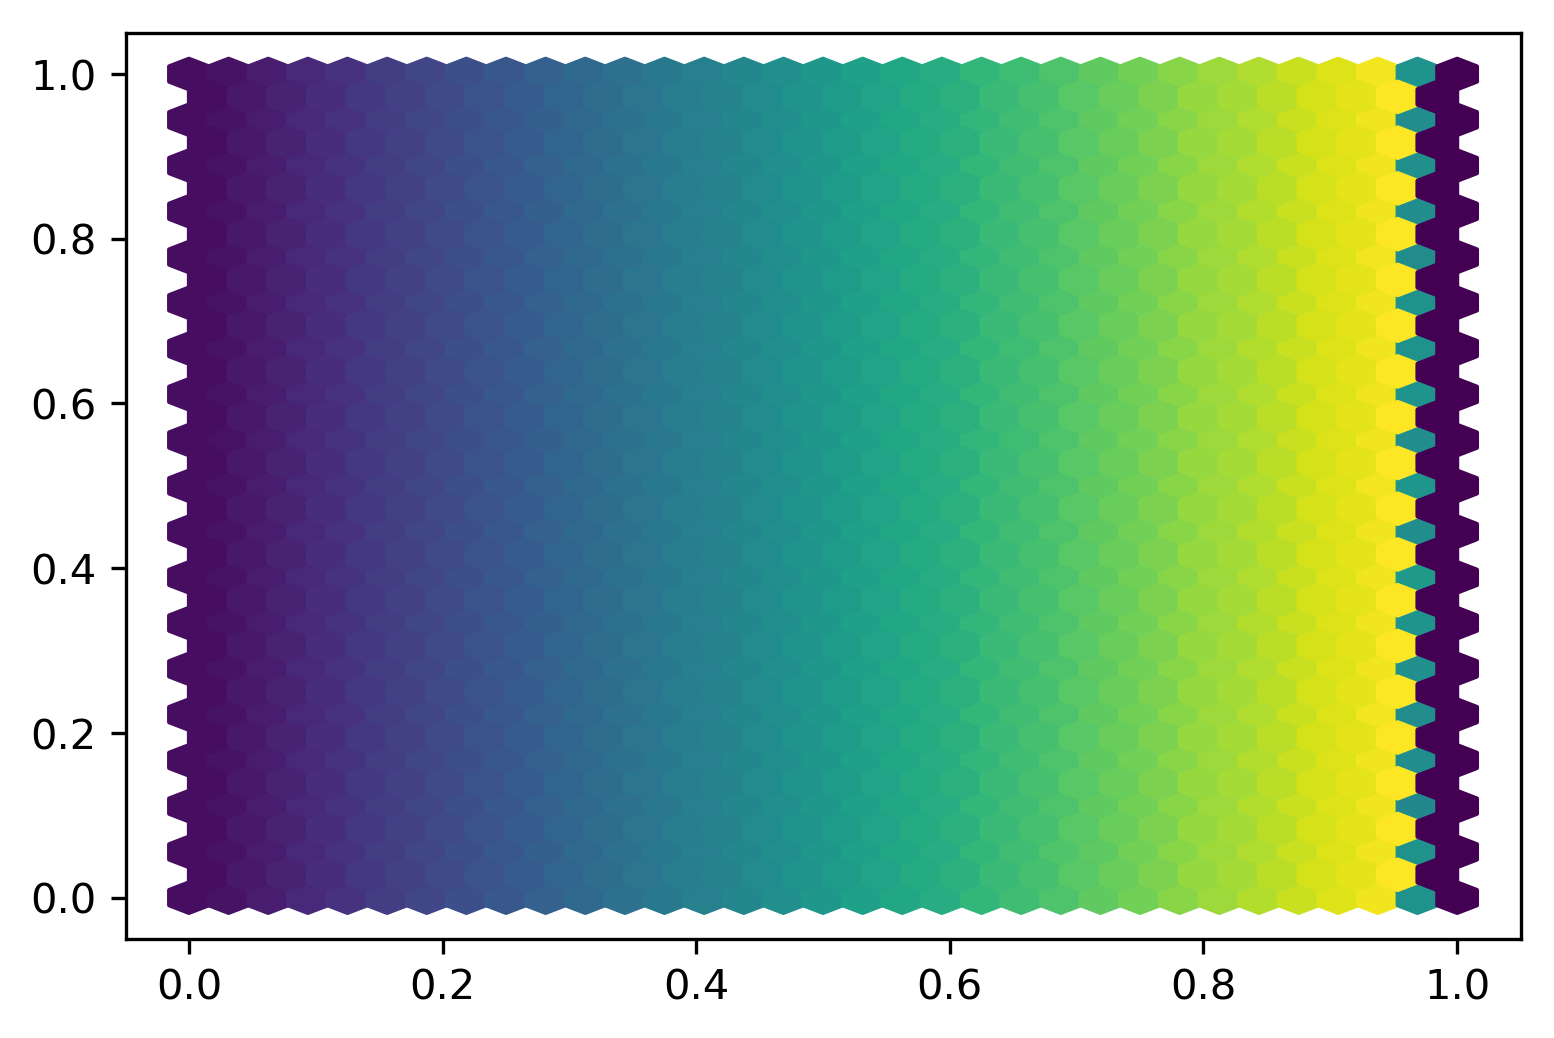

In [217]:
plt.hexbin(xy[:,0], xy[:,1], weights_x, gridsize=32)

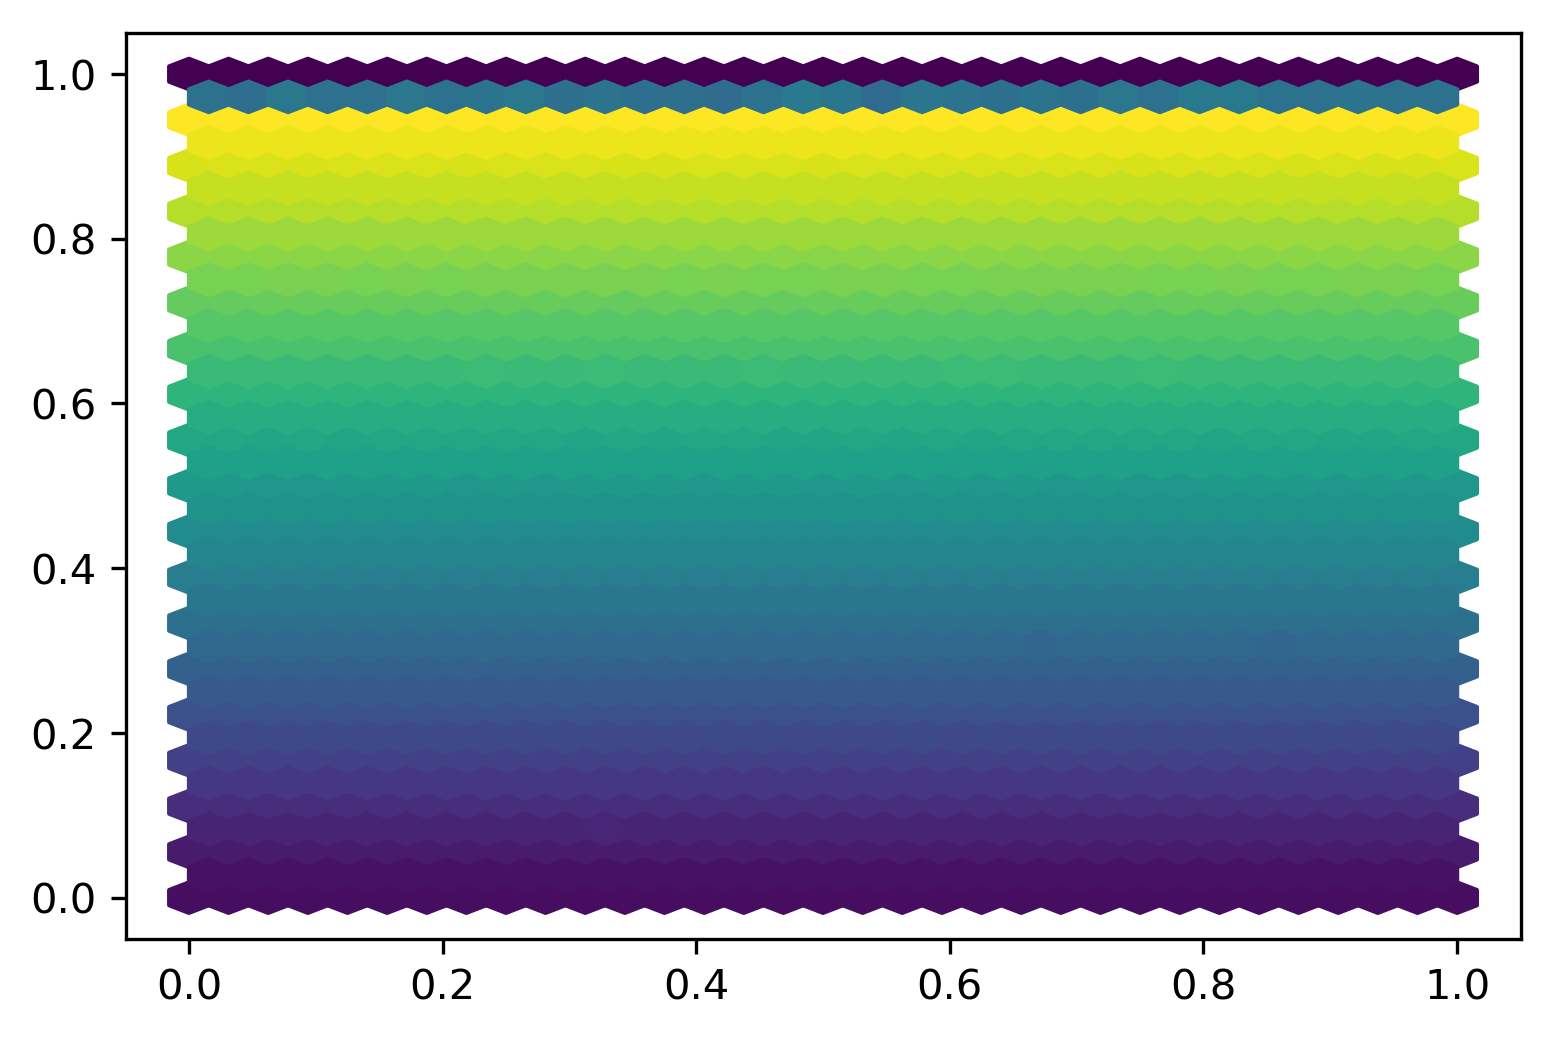

In [218]:
plt.hexbin(xy[:,0], xy[:,1], weights_y, gridsize=32)